# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [269]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [270]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [271]:
A @ e_1

array([1, 4, 7])

First column of A gets "selected." As the dot product of the each row and e_1 mutliplies the 2nd and 3rd element of each row by 0, only preserving the first element of each row -- in other words, preserving only the first column. 

In [272]:
A @ e_2

array([2, 5, 8])

Second column of A gets "selected." As the dot product of the each row and e_1 mutliplies the 1st and 3rd element of each row by 0, only preserving the second element of each row -- in other words, preserving only the second column. 

In [273]:
A @ e_3

array([3, 6, 9])

Third column of A gets "selected." As the dot product of the each row and e_1 mutliplies the 1st and 2nd element of each row by 0, only preserving the third element of each row -- in other words, preserving only the third column.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [274]:
A @ np.array([1,1,1])

array([ 6, 15, 24])

Each row of A is right multiplied by the vector u = (1,1,1), then the sum of these elemnets is taken. Effectively, the output is the sum of each row in A. 

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [275]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

A @ x

array([-2,  4, 11])

Multiplying x by it's identity matrix will output x, because each of the three row multiplications only preserves the first, second, and third element respectively. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [276]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

A @ x

array([11, -2,  4])

In [277]:
B = np.array([ [0,.5,.5],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

B @ x

array([ 7.5, -2. ,  4. ])

If they remain 1's and 0's (just not in identity matrix), then the elements of the output are swtiched around accordingly. If they are fractions, the output is mixed, based on weights. 

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [278]:
rng = np.random.default_rng(100) # Create random number generator
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1

print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [279]:
A @ e_1

array([0.50052958, 0.02574731, 0.47372311])

In [280]:
A @ e_2

array([0.24049286, 0.39251588, 0.36699127])

In [281]:
A @ e_3

array([0.18358131, 0.37907577, 0.43734292])

Each output represents a column of A, each of which sum to 1. The product of A and e_1 is $a_{i1}$. The product of A and e_2 is $a_{i2}$. The product of A and e_3 is $a_{i3}$.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [282]:
vectors = [e_1, e_2, e_3]
names = ['e1', 'e2', 'e3']

# Step 3: Multiply each vector by A five times
for name, v in zip(names, vectors):
    x = v.copy()
    print(f"Starting with {name}:")
    for i in range(1, 6):
        x = A @ x  # matrix multiplication
        print(f"  After multiplication {i}: {x}")
    print()  # empty line for readability

Starting with e1:
  After multiplication 1: [0.50052958 0.02574731 0.47372311]
  After multiplication 2: [0.34368862 0.20257047 0.45374091]
  After multiplication 3: [0.30404142 0.26036337 0.43559521]
  After multiplication 4: [0.29476439 0.27514859 0.43008701]
  After multiplication 5: [0.29266551 0.27862515 0.42870935]

Starting with e2:
  After multiplication 1: [0.24049286 0.39251588 0.36699127]
  After multiplication 2: [0.28214379 0.29937825 0.41847795]
  After multiplication 3: [0.29004438 0.28341002 0.42654561]
  After multiplication 4: [0.29163968 0.2804039  0.42795643]
  After multiplication 5: [0.29197422 0.27979983 0.42822595]

Starting with e3:
  After multiplication 1: [0.18358131 0.37907577 0.43734292]
  After multiplication 2: [0.26334088 0.31930609 0.41735304]
  After multiplication 3: [0.28521895 0.29032145 0.4244596 ]
  After multiplication 4: [0.29050361 0.28220175 0.42729464]
  After multiplication 5: [0.29171646 0.2802254  0.42805814]



Each sequence converges to ~ [0.29 0.28 0.43].

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [283]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [284]:
state_1 = np.array([1,0])

cond_1 = T @ state_1
print(cond_1) # First multiplication

[0.25 0.75]


The object we're looking at is a vector: [0.25 0.75]. This vector represents the probability that the subsequent state is 1 or 2, respectively. That means, there is a 25% chance the current state will transition to state 1 and a 75% the current state will transition to state 2.

In [285]:
cond_2 = T @ cond_1
print(cond_2) # Second multiplication

[0.4375 0.5625]


This vector, [0.4375 0.5625], represents the probability that after 2 steps/transitions. The probability that it will be at state 1 is ~0.43 and state 2 is ~0.56.

In [286]:
# analysis with initial state [1,0]
state_1 = np.array([1,0])

# keep multiplying by T with for loop
cond = state_1.copy()
for i in range(1, 6):
    cond = T @ cond
    print(f"After multiplication {i}: {cond}")

After multiplication 1: [0.25 0.75]
After multiplication 2: [0.4375 0.5625]
After multiplication 3: [0.390625 0.609375]
After multiplication 4: [0.40234375 0.59765625]
After multiplication 5: [0.39941406 0.60058594]


After several multiplications, the state vector converges to a steady state. The steady state is ~ [0.4, 0.6]. This means that after many transitions, the probability of being in state 1 is ~ 0.4 and in state 2 is ~ 0.6.

In [287]:
# above analysis again with initial state [0,1]
state_2 = np.array([0,1])

cond = state_2.copy()
for i in range(1, 6):
    cond = T @ cond
    print(f"After multiplication {i}: {cond}")

After multiplication 1: [0.5 0.5]
After multiplication 2: [0.375 0.625]
After multiplication 3: [0.40625 0.59375]
After multiplication 4: [0.3984375 0.6015625]
After multiplication 5: [0.40039062 0.59960938]


3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [288]:
import pandas as pd

cvill_weather = pd.read_csv('https://raw.githubusercontent.com/ds4e/understanding_uncertainty_assignments/refs/heads/main/cville_weather.csv')

cvill_weather.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.00,",,N",NaN,NaN


There are many missing data issues. The data is visibly filled with NaN's. 

In [289]:
# extract percipitation column
percipitation = cvill_weather['PRCP']

# create binary rain/no rain list of 0s and 1s
rain = [1 if p > 0 else 0 for p in percipitation]

In [290]:
# Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
import numpy as np

# Initialize
transitions = np.zeros((2,2))

# Loop through consecutive days
for today, tomorrow in zip(rain[:-1], rain[1:]):
    transitions[today, tomorrow] += 1 # adds to transition matrix count of occurrences

# Convert counts to probabilities (rows sum to 1)
T = transitions / transitions.sum(axis=1, keepdims=True) # keepdims to maintain 2D structure for broadcasting
print(T)

[[0.73160173 0.26839827]
 [0.35195531 0.64804469]]


How likely it is to rain if it was rainy yesterday is represented by the element in the bottom right. So there is a ~ 0.648% chance that it will rain. 

How likely it is to rain if it was clear yesterday is represented by the element in the bottom left. So there is a ~ 0.352% chance that it will rain. 

In [291]:
# forecast distribution
clear_day = T[[1,0]]  # state vector for clear day

rainy_day = T[[0,1]]  # state vector for rainy day

# keep multiplying by T with for loop, start with clear day
cond = clear_day.copy()
for i in range(1, 9):
    cond = T @ cond
    print(f"After multiplication {i}: {cond}")

After multiplication 1: [[0.45385175 0.54614825]
 [0.59798316 0.40201684]]
After multiplication 2: [[0.49253637 0.50746363]
 [0.54725534 0.45274466]]
After multiplication 3: [[0.50722285 0.49277715]
 [0.52799671 0.47200329]]
After multiplication 4: [[0.51279852 0.48720148]
 [0.52068524 0.47931476]]
After multiplication 5: [[0.5149153  0.4850847 ]
 [0.51790947 0.48209053]]
After multiplication 6: [[0.51571893 0.48428107]
 [0.51685565 0.48314435]]
After multiplication 7: [[0.51602402 0.48397598]
 [0.51645558 0.48354442]]
After multiplication 8: [[0.51613985 0.48386015]
 [0.51630369 0.48369631]]


In [292]:
# keep multiplying by T with for loop, start with rainy day
cond = rainy_day.copy()
for i in range(1, 9):
    cond = T @ cond
    print(f"After multiplication {i}: {cond}")

After multiplication 1: [[0.62970529 0.37029471]
 [0.48557388 0.51442612]]
After multiplication 2: [[0.59102067 0.40897933]
 [0.5363017  0.4636983 ]]
After multiplication 3: [[0.57633419 0.42366581]
 [0.55556033 0.44443967]]
After multiplication 4: [[0.57075852 0.42924148]
 [0.5628718  0.4371282 ]]
After multiplication 5: [[0.56864174 0.43135826]
 [0.56564757 0.43435243]]
After multiplication 6: [[0.56783811 0.43216189]
 [0.56670139 0.43329861]]
After multiplication 7: [[0.56753302 0.43246698]
 [0.56710146 0.43289854]]
After multiplication 8: [[0.56741719 0.43258281]
 [0.56725335 0.43274665]]


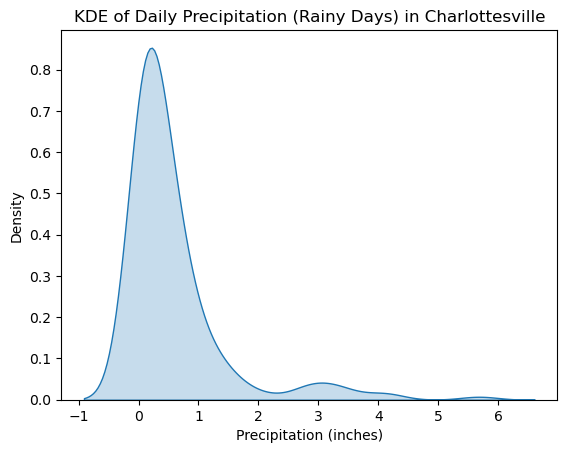

In [293]:
# Plot KDE of PRCP values, conditional on being rainy
import matplotlib.pyplot as plt
import seaborn as sns

#rainy days where PRCP > 0
rainy_days = cvill_weather[cvill_weather['PRCP'] > 0]['PRCP'].dropna()

# Plot the KDE of PRCP on rainy days
sns.kdeplot(rainy_days, fill=True)
plt.title('KDE of Daily Precipitation (Rainy Days) in Charlottesville')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Density')
plt.show()

## Describe one way of making your model better for forecasting and simulation the weather.

To create a better model, you could use a higher-order Markov chain that takes into account the weather of the last few days rather than just the immediate day before.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

# open taxi data
with open('/Users/hmillspaugh/DS5030_Uncert/TaxiActivity/taxicab.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data)

print(data[0][:1]) # first two trips

[0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object, 22              Midtown
17             Kips Bay
17             Kips Bay
7          East Village
7          East Village
            ...        
34      Upper East Side
34      Upper East Side
34      Upper East Side
34      Upper East Side
0     Outside Manhattan
Name: nbhd, Length: 30184, dtype: object, 3               Chelsea
34      Upper East Side
34      Upper East Side
0     Outside Manhattan
0     Outside Manhattan
            ...        
20      Lower East Side
20      Lower East Side
34      Upper East Side
34      Upper East Side
7          East Village
Name: nbhd, Length: 21202, dtype: object, 13    Greenwich Village
6           East Harlem
22              Midtown
0     Out

In [295]:
## extract state space (unique states visited across all trips)
states = set(data[0]) # first trip
for i in range(1, len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i) # union

print("\nState space (Manhattan neighborhoods):", states)
print("Number of states:", S)


State space (Manhattan neighborhoods): {'Gramercy', 'Ellis Island', 'Stuyvesant Town', 'West Village', 'Marble Hill', 'Lower East Side', 'Nolita', 'Morningside Heights', 'Two Bridges', 'Outside Manhattan', 'Tribeca', 'Chinatown', 'Little Italy', 'Inwood', 'Greenwich Village', 'NoHo', 'Battery Park City', 'Chelsea', 'Civic Center', 'Midtown', 'Central Park', 'Governors Island', "Hell's Kitchen", 'SoHo', 'Roosevelt Island', 'East Harlem', 'Murray Hill', 'Flatiron District', 'Upper East Side', 'Kips Bay', 'Liberty Island', 'Financial District', 'East Village', "Randall's Island", 'Washington Heights', 'Upper West Side', 'Harlem', 'Theater District'}
Number of states: 38


In [296]:
# Convert to ordered list
states = sorted(list(states))  # now it’s an ordered list
S = len(states)
tr_counts = np.zeros((S, S))

## Compute transition counts:
for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        state_from = seq[t-1] # previous state
        state_to = seq[t] # current state
        # Determine transition indicies
        index_from = states.index(state_from)
        index_to = states.index(state_to)
        # Update transition count matrix
        tr_counts[index_from, index_to] += 1

In [297]:
# Assume `states` is your list of state names
Ta= tr_counts / tr_counts.sum(axis=1, keepdims=True)  # convert counts → probabilities

# Create a DataFrame
T_df = pd.DataFrame(Ta, index=states, columns=states)

# Display nicely
pd.set_option('display.float_format', '{:.2f}'.format)  # format probabilities to 2 decimals
print("Transition Matrix:")
print(T_df)

Transition Matrix:
                     Battery Park City  Central Park  Chelsea  Chinatown  \
Battery Park City                 0.26          0.00     0.07       0.01   
Central Park                      0.00          0.14     0.03       0.00   
Chelsea                           0.01          0.01     0.33       0.00   
Chinatown                         0.01          0.00     0.05       0.13   
Civic Center                      0.02          0.00     0.05       0.03   
East Harlem                       0.00          0.06     0.02       0.00   
East Village                      0.01          0.00     0.07       0.01   
Ellis Island                      0.00          0.00     0.00       0.00   
Financial District                0.04          0.00     0.05       0.02   
Flatiron District                 0.01          0.00     0.15       0.00   
Governors Island                  0.00          0.00     0.17       0.00   
Gramercy                          0.01          0.00     0.10       0

In [298]:
# Normalize
tr_pr = tr_counts / tr_counts.sum(axis=1, keepdims=True)
tr_df = pd.DataFrame(tr_pr, index=states, columns=states)

# Style
tr_df.style.background_gradient(cmap='viridis').format("{:.3f}")

,Battery Park City,Central Park,Chelsea,Chinatown,Civic Center,East Harlem,East Village,Ellis Island,Financial District,Flatiron District,Governors Island,Gramercy,Greenwich Village,Harlem,Hell's Kitchen,Inwood,Kips Bay,Liberty Island,Little Italy,Lower East Side,Marble Hill,Midtown,Morningside Heights,Murray Hill,NoHo,Nolita,Outside Manhattan,Randall's Island,Roosevelt Island,SoHo,Stuyvesant Town,Theater District,Tribeca,Two Bridges,Upper East Side,Upper West Side,Washington Heights,West Village
Battery Park City,0.262,0.003,0.071,0.007,0.004,0.002,0.020,0.000,0.091,0.010,0.000,0.008,0.019,0.001,0.031,0.000,0.008,0.000,0.002,0.010,0.000,0.074,0.001,0.012,0.005,0.003,0.054,0.000,0.000,0.053,0.003,0.023,0.117,0.001,0.024,0.018,0.001,0.060
Central Park,0.003,0.141,0.032,0.001,0.000,0.018,0.006,0.000,0.004,0.007,0.000,0.005,0.007,0.012,0.036,0.000,0.005,0.000,0.000,0.002,0.000,0.190,0.009,0.009,0.002,0.001,0.034,0.000,0.000,0.006,0.001,0.036,0.004,0.000,0.196,0.221,0.002,0.009
Chelsea,0.008,0.006,0.335,0.003,0.001,0.004,0.027,0.000,0.011,0.030,0.000,0.020,0.027,0.005,0.073,0.001,0.016,0.000,0.001,0.009,0.000,0.132,0.002,0.021,0.006,0.003,0.047,0.000,0.000,0.022,0.004,0.037,0.014,0.000,0.040,0.034,0.002,0.062
Chinatown,0.012,0.002,0.046,0.132,0.025,0.003,0.081,0.000,0.058,0.007,0.000,0.023,0.024,0.003,0.018,0.000,0.017,0.000,0.028,0.096,0.000,0.057,0.002,0.014,0.017,0.023,0.109,0.000,0.000,0.061,0.006,0.016,0.048,0.003,0.024,0.012,0.001,0.032
Civic Center,0.024,0.002,0.050,0.033,0.095,0.004,0.045,0.000,0.109,0.011,0.000,0.014,0.022,0.002,0.016,0.000,0.011,0.000,0.011,0.036,0.000,0.068,0.001,0.015,0.012,0.015,0.094,0.000,0.000,0.068,0.004,0.017,0.136,0.003,0.029,0.012,0.001,0.038
East Harlem,0.001,0.057,0.020,0.001,0.001,0.227,0.013,0.000,0.004,0.005,0.000,0.006,0.005,0.044,0.019,0.001,0.009,0.000,0.000,0.004,0.000,0.100,0.014,0.010,0.001,0.001,0.060,0.001,0.000,0.003,0.002,0.014,0.003,0.000,0.276,0.088,0.005,0.006
East Village,0.005,0.003,0.066,0.007,0.002,0.005,0.267,0.000,0.017,0.018,0.000,0.069,0.040,0.004,0.020,0.000,0.045,0.000,0.002,0.032,0.000,0.090,0.001,0.029,0.023,0.008,0.081,0.000,0.000,0.025,0.020,0.013,0.011,0.001,0.041,0.017,0.001,0.035
Ellis Island,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.333,0.000,0.000,0.000,0.000,0.000
Financial District,0.044,0.003,0.050,0.019,0.008,0.003,0.040,0.000,0.308,0.009,0.000,0.010,0.019,0.002,0.022,0.000,0.012,0.000,0.003,0.028,0.000,0.077,0.001,0.015,0.006,0.006,0.079,0.000,0.000,0.040,0.005,0.019,0.085,0.004,0.030,0.013,0.001,0.037
Flatiron District,0.007,0.005,0.154,0.003,0.002,0.004,0.039,0.000,0.012,0.158,0.000,0.054,0.039,0.003,0.032,0.000,0.040,0.000,0.001,0.010,0.000,0.162,0.001,0.042,0.009,0.004,0.047,0.000,0.000,0.022,0.006,0.026,0.012,0.000,0.047,0.023,0.001,0.035


## Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips

In [299]:
start_index = states.index("Hell's Kitchen")
start_state = np.zeros(S)
start_state[start_index] = 1

print(f"Starting vector (Hell's Kitchen): {start_state}")

Starting vector (Hell's Kitchen): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [300]:
def forecast_markov(T, start, steps_list):
    """
    T: transition matrix (S x S)
    start: initial state vector (length S)
    steps_list: list of step counts to forecast
    """
    cond = start.copy()
    forecasts = {}
    
    for step in range(1, max(steps_list)+1):
        cond = T @ cond
        if step in steps_list:
            forecasts[step] = cond.copy()
    
    return forecasts


In [306]:
steps = [2, 3, 5, 10]
forecasts = forecast_markov(Ta, start_state, steps)

for step, dist in forecasts.items():
    print(f"\nForecast after {step} trips:")
    # show top 5 likely locations
    top_indices = np.argsort(dist)[::-1][:5]
    for idx in top_indices:
        print(f"{states[idx]}: {dist[idx]:.3f}")



Forecast after 2 trips:
Hell's Kitchen: 0.119
Theater District: 0.087
Inwood: 0.075
Upper West Side: 0.074
Marble Hill: 0.070

Forecast after 3 trips:
Hell's Kitchen: 0.075
Theater District: 0.067
Upper West Side: 0.066
Inwood: 0.065
Washington Heights: 0.064

Forecast after 5 trips:
Morningside Heights: 0.058
Washington Heights: 0.057
Inwood: 0.057
Upper West Side: 0.057
Hell's Kitchen: 0.057

Forecast after 10 trips:
Morningside Heights: 0.054
Washington Heights: 0.054
Harlem: 0.054
Inwood: 0.054
Upper West Side: 0.054


## Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

Relied heavily on AI for this q...

In [ ]:
# Let's start from Hell's Kitchen
S = len(states)
p = np.zeros(S)
p[states.index("Hell's Kitchen")] = 1

# Iterate until convergence
tol = 1e-8  # tolerance for convergence
diff = 1.0
iteration = 0

while diff > tol and iteration < 1000:
    p_next = T.T @ p
    diff = np.linalg.norm(p_next - p)
    p = p_next
    iteration += 1

print(f"Converged after {iteration} iterations")


Converged after 29 iterations


In [311]:
# Top 10 neighborhoods where cabs spend most of their time
top_indices = np.argsort(p)[::-1][:10]

# Display results
print("\nStationary distribution (top 10):")
for idx in top_indices:
    print(f"{states[idx]}: {p[idx]:.3f}")



Stationary distribution (top 10):
Midtown: 0.168
Upper East Side: 0.122
Outside Manhattan: 0.103
Chelsea: 0.086
Upper West Side: 0.079
Hell's Kitchen: 0.053
East Village: 0.039
Theater District: 0.038
West Village: 0.037
Murray Hill: 0.028
